In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from matplotlib.ticker import LogFormatterExponent

ZF_ALL = np.load('fits/ZFOURGE_TOTAL_UPDATE.npz', allow_pickle=True)
CG_SF = np.load('fits/CIGALE_SF_UPDATE.npz', allow_pickle=True)
CG_AGN = np.load('fits/CIGALE_AGN_UPDATE.npz', allow_pickle=True)
# CG_AGN = np.load('fits/CIGALE_AGN_UPDATE_nothorne.npz', allow_pickle=True)

print(ZF_ALL['s'])
print(CG_SF['s'])
print(CG_AGN['s'])

# export = True
export = False

[1.1 1.0 0.9 0.8 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
[1.1 1.0 0.9 0.8 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]
[1.1 1.0 0.9 0.8 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7]


In [8]:
def schechter_luminosity(L, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-1.2) * np.exp(-L / L_star)

def saunders_luminosity(L, L_star, phi_star, sigma):
    return phi_star * (L / L_star) ** (1-1.3) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + (L / L_star)))**2)

# Sanders local
sanders_local_l = [7.75, 8.25, 8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25]
sanders_local_p = [-0.95, -1.85, -1.87, -2.17, -2.48, -2.76, -3.57, -4.41, -5.52, -6.83]

# Rodighiero 
R_L_03 = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75] # 0 < z < 0.3
R_L_04 =                   [10.25, 10.75, 11.25, 11.75] # 0.3 < z < 0.45
R_L_06 =                          [10.75, 11.25, 11.75] # 0.45 < z < 0.6
R_L_08 =                          [10.75, 11.25, 11.75, 12.25, 12.75] # 0.6 < z < 0.8
R_L_10 =                                 [11.25, 11.75, 12.25, 12.75] # 0.8 < z < 1.0
R_L_12 =                                 [11.25, 11.75, 12.25, 12.75] # 1.0 < z < 1.2
R_L_17 =                                        [11.75, 12.25, 12.75, 13.25] # 1.2 < z < 1.7
R_L_20 =                                        [11.75, 12.25, 12.75, 13.25] # 1.7 < z < 2
R_L_25 =                                               [12.25, 12.75, 13.25, 13.75] # 2 < z < 2.5
R_L = [R_L_03, R_L_04, R_L_06, R_L_08, R_L_10, R_L_12, R_L_17, R_L_20, R_L_25]

R_P_03 = [-1.67, -1.93, -2.17, -2.51, -2.90, -4.07, -4.61] # 0 < z < 0.3
R_P_04 =                      [-2.65, -2.56, -3.34, -4.52] # 0.3 < z < 0.45
R_P_06 =                             [-2.36, -2.89, -4.05] # 0.45 < z < 0.6
R_P_08 =                             [-2.72, -2.64, -3.72, -4.94, -5.7] # 0.6 < z < 0.8
R_P_10 =                                    [-2.64, -3.27, -4.54, -5.3] # 0.8 < z < 1.0
R_P_12 =                                    [-2.83, -3.05, -4.28, -5.6] # 1.0 < z < 1.2
R_P_17 =                                           [-2.97, -3.46, -4.4, -5.92] # 1.2 < z < 1.7
R_P_20 =                                           [-3.45, -3.54, -4.4, -5.61] # 1.7 < z < 2
R_P_25 =                                                  [-3.61, -4.4, -6.09, -6.15] # 2 < z < 2.5
R_P = [R_P_03, R_P_04, R_P_06, R_P_08, R_P_10, R_P_12, R_P_17, R_P_20, R_P_25]

# Gruppioni
G_L_03 = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75, 12.25] # 0.0 < z < 0.3
G_L_04 =                   [10.25, 10.75, 11.25, 11.75, 12.25] # 0.3 < z < 0.45
G_L_06 =                          [10.75, 11.25, 11.75, 12.25] # 0.45 < z < 0.6
G_L_08 =                          [10.75, 11.25, 11.75, 12.25, 12.75] # 0.6 < z < 0.8
G_L_10 =                                 [11.25, 11.75, 12.25, 12.75] # 0.8 < z < 1.0
G_L_12 =                                 [11.25, 11.75, 12.25, 12.75] # 1.0 < z < 1.2
G_L_17 =                                 [11.25, 11.75, 12.25, 12.75, 13.25] # 1.2 < z < 1.7
G_L_20 =                                        [11.75, 12.25, 12.75, 13.25] # 1.7 < z < 2
G_L_25 =                                               [12.25, 12.75, 13.25] # 2 < z < 2.5
G_L_30 =                                               [12.25, 12.75, 13.25, 13.75] # 2.5 < z < 3
G_L_42 =                                                      [12.75, 13.25, 13.75] # 3 < z < 4.2
G_L = [G_L_03, G_L_04, G_L_06, G_L_08, G_L_10, G_L_12, G_L_17, G_L_20, G_L_25, G_L_30, G_L_42]

G_P_03 = [-2.21, -2.18, -2.28, -2.50, -2.71, -3.49, -4.79, -5.27] # 0.0 < z < 0.3
G_P_04 =                      [-2.37, -2.64, -3.12, -4.29, -5.58] # 0.3 < z < 0.45
G_P_06 =                             [-2.61, -2.99, -3.89, -5.50] # 0.45 < z < 0.6
G_P_08 =                             [-2.27, -2.89, -3.53, -4.75, -5.79] # 0.6 < z < 0.8    
G_P_10 =                                    [-3.09, -3.24, -4.23, -5.74] # 0.8 < z < 1.0
G_P_12 =                                    [-2.80, -3.17, -4.00, -5.18] # 1.0 < z < 1.2
G_P_17 =                                    [-2.93, -3.29, -3.81, -4.85, -6.48] # 1.2 < z < 1.7
G_P_20 =                                           [-3.76, -3.96, -4.42, -6.01] # 1.7 < z < 2
G_P_25 =                                                  [-3.53, -4.40, -5.79] # 2 < z < 2.5
G_P_30 =                                                  [-3.75, -4.15, -5.11, -6.54] # 2.5 < z < 3
G_P_42 =                                                         [-4.65, -5.75, -7.18] # 3 < z < 4.2
G_P = [G_P_03, G_P_04, G_P_06, G_P_08, G_P_10, G_P_12, G_P_17, G_P_20, G_P_25, G_P_30, G_P_42]

""" Symeonidis """
S_L_02 = [10.17, 10.53, 10.86, 11.22, 11.57]
S_L_04 = [10.17, 10.53, 10.86, 11.22, 11.55, 11.91, 12.26, 12.62]
S_L_06 = [10.17, 10.51, 10.87, 11.20, 11.56, 11.92, 12.26, 12.59]
S_L_08 = [10.17, 10.51, 10.86, 11.22, 11.57, 11.88, 12.24, 12.60, 12.93]
S_L_10 = [10.20, 10.53, 10.91, 11.22, 11.57, 11.91, 12.26, 12.60, 12.95]
S_L_12 = [10.15, 10.51, 10.85, 11.18, 11.56, 11.92, 12.26, 12.59, 12.97, 13.31]
S_L_15 = [10.17, 10.53, 10.85, 11.23, 11.58, 11.90, 12.26, 12.61, 12.95, 13.31]
S_L_20 = [10.19, 10.52, 10.86, 11.23, 11.58, 11.89, 12.25, 12.60, 12.91, 13.26, 13.59]
S_L_25 = [10.15, 10.53, 10.85, 11.20, 11.56, 11.92, 12.23, 12.59, 12.95, 13.29]
S_L = [S_L_02, S_L_04, S_L_06, S_L_08, S_L_10, S_L_12, S_L_15, S_L_20, S_L_25]

S_P_02 = [-4.09, -4.56, -5.04, -5.40, -5.59]
S_P_04 = [-4.13, -4.31, -4.60, -4.93, -5.48, -5.84, -6.24, -6.43]
S_P_06 = [-3.91, -4.16, -4.42, -4.67, -5.15, -5.55, -6.13, -6.86]
S_P_08 = [-3.72, -3.87, -4.09, -4.49, -4.89, -5.33, -5.70, -6.06, -6.94]
S_P_10 = [-3.80, -3.94, -4.09, -4.24, -4.53, -5.00, -5.40, -5.84, -6.72]
S_P_12 = [-3.83, -3.94, -4.02, -4.20, -4.53, -4.86, -5.48, -6.02, -6.21, -6.90]
S_P_15 = [-3.84, -3.99, -4.06, -4.13, -4.35, -4.68, -5.23, -5.75, -6.48, -6.81]
S_P_20 = [-3.91, -4.06, -4.13, -4.24, -4.39, -4.65, -5.05, -5.60, -6.19, -6.74, -7.22]
S_P_25 = [-4.06, -4.02, -4.10, -4.28, -4.39, -4.61, -5.01, -5.53, -6.08, -6.66]
S_P = [S_P_02, S_P_04, S_P_06, S_P_08, S_P_10, S_P_12, S_P_15, S_P_20, S_P_25]

""" Thorne """
T_L_028 = [5.10e+43, 1.82e+44, 5.87e+44, 1.89e+45]
T_L_045 = [5.33e+43, 1.873e+44, 5.92e+44, 1.68e+45, 5.33e+45]
T_L_056 = [1.75e+44, 6.22e+44, 1.98e+45, 6.33e+45]
T_L_082 = [1.87e+44, 5.33e+44, 1.87e+45, 5.33e+45, 1.87e+46, 5.33e+46]
T_L_10 = [5.03e+44, 1.78e+45, 5.12e+45, 1.63e+46]
T_L_12 = [5.92e+44, 1.87e+45, 5.92e+45, 1.87e+46, 5.92e+46]
T_L_175 = [1.60e+45, 5.69e+45, 1.81e+46, 5.21e+46]
T_L_220 = [1.78e+45, 5.69e+45, 1.81e+46, 5.79e+46, 1.85e+47]
T_L = [T_L_028, T_L_045, T_L_056, T_L_082, T_L_10, T_L_12, T_L_175, T_L_220]
    
T_P_028 = [0.00041, 0.00013, 0.000068, 0.000054]
T_P_045 = [0.0010, 0.00026, 0.00010, 0.000043, 0.000011]
T_P_056 = [0.00033, 0.000085, 0.000034, 0.0000036]
T_P_082 = [0.00033, 0.000085, 0.000022, 0.0000089, 0.0000056, 0.0000014]
T_P_10 = [0.00012, 0.000063, 0.000025, 0.0000031]
T_P_12 = [0.000079, 0.000039, 0.000015, 0.0000031, 0.0000012]
T_P_175 = [0.000027, 0.000014, 0.0000056, 0.0000028]
T_P_220 = [0.000027, 0.000014, 0.0000071, 0.0000022, 7.39e-7]
T_P = [T_P_028, T_P_045, T_P_056, T_P_082, T_P_10, T_P_12, T_P_175, T_P_220]

""" Delvecchio """
D_L_03 = [8.9, 9.6, 10.3, 11, 11.7]
D_L_07 = [9.6, 10.3, 11, 11.7, 12.4]
D_L_12 = [10.3, 11, 11.7, 12.4, 13.1]
D_L_18 = [11, 11.7, 12.4, 13.1, 13.8]
D_L_25 = [11.85, 12.53, 13.26, 13.96]
D_L_38 = [11.83, 12.53, 13.23, 13.93]
D_L = [D_L_03, D_L_07, D_L_07, D_L_12, D_L_12, D_L_18, D_L_18, D_L_25, D_L_25, D_L_38]

D_P_03 = [0.00308, 0.000882, 0.000134, 0.0000281, 0.00000486]
D_P_07 = [0.000882, 0.000390, 0.000104, 0.0000384, 0.00000313]
D_P_12 = [0.000184, 0.0000634, 0.0000339, 0.00000803, 4.498e-7]
D_P_18 = [0.0000688, 0.0000224, 0.0000113, 0.00000175, 2.706e-7]
D_P_25 = [0.0000224, 0.00000732, 0.00000571, 3.471e-7]
D_P_38 = [0.0000136, 0.00000326, 0.00000254, 1.545e-7]
D_P = [D_P_03, D_P_07, D_P_07, D_P_12, D_P_12, D_P_18, D_P_18, D_P_25, D_P_25, D_P_38]

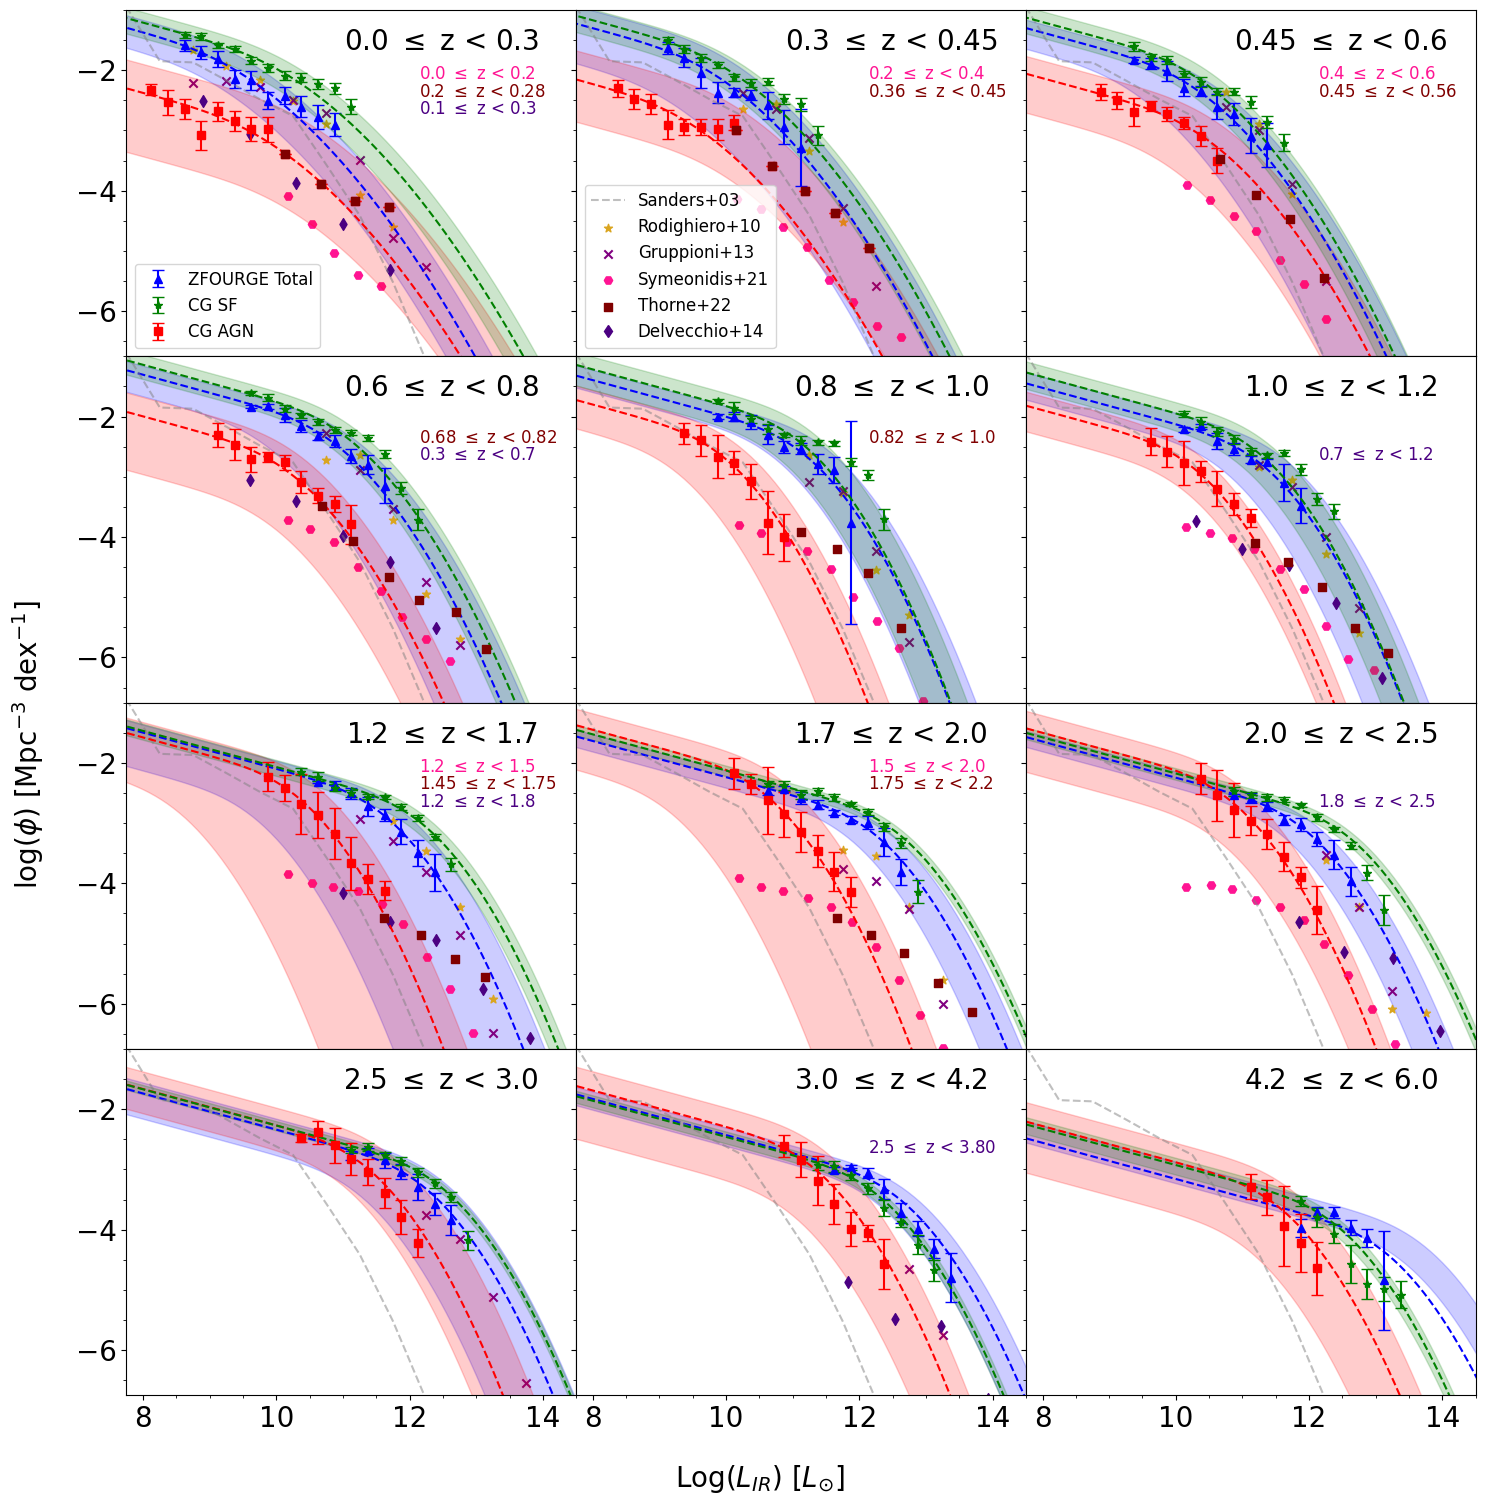

In [13]:
from matplotlib.lines import Line2D

fig, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.flatten()

# ZFOURGE TOTAL
for i, (ax, l, p, e, params, perr, (z_start, z_end), min_l, sigma) in enumerate(zip(axes, ZF_ALL['x'], ZF_ALL['y'], ZF_ALL['e'], ZF_ALL['saunder_p'], ZF_ALL['saunder_e'], ZF_ALL['z'], ZF_ALL['m'], ZF_ALL['s'])):

    # Phi values
    yerr = np.array(e) / (np.array(p) * np.log(10))    
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='^', capsize=4, label='ZFOURGE Total' if i == 0 else '', color='blue')

    # Saunders Fit
    l = np.logspace(6, 15, 100)
    ax.plot(np.log10(l), np.log10(saunders_luminosity(l, *params, sigma)), label='Saunders Fit' if i == 2 else "", color='blue', linestyle='--')
    p_up = params + perr
    p_down = np.abs(params - perr)
    ax.fill_between(np.log10(l), 
        np.log10(saunders_luminosity(l, *p_down, sigma)), 
        np.log10(saunders_luminosity(l, *p_up, sigma)), 
        color='blue', alpha=0.2, label='Fit Error' if i == 2 else "")

# Sanders local
for i, ax in enumerate(axes):
    ax.plot(sanders_local_l, sanders_local_p, label=f'Sanders+03' if i == 1 else '', color='grey', linestyle='--', alpha=0.5)

# Rodighiero
for i, (ax, lum, phi) in enumerate(zip(axes, R_L, R_P)):
    ax.scatter(lum, phi, color='goldenrod', marker='*', label='Rodighiero+10' if i == 1 else '')
    
# Gruppioni
for i, (ax, lum, phi) in enumerate(zip(axes, G_L, G_P)):
    ax.scatter(lum, phi, color='purple', marker='x', label='Gruppioni+13' if i == 1 else '')

# Symeonidis
for i, (ax, lum, phi) in enumerate(zip(axes, S_L, S_P)):
    ax.scatter(lum, phi, color='deeppink', marker='H', label='Symeonidis+21' if i == 1 else "")

# Thorne
for i, (ax, lum, phi) in enumerate(zip(axes, T_L, T_P)):
    ax.scatter(np.log10(np.array(lum)*(2.612*10**-34)), np.log10(phi), color='maroon', marker='s', label='Thorne+22' if i == 1 else "", zorder=10)

""" CIGALE SF """
for i, (ax, l, p, e, (z_start, z_end)) in enumerate(zip(axes, CG_SF['x'], CG_SF['y'], CG_SF['e'], CG_SF['z'])):
    yerr = e / (p*np.log(10))
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='*', capsize=4, label='CG SF' if i == 0 else '', color='green')

""" CIGALE AGN """
for i, (ax, l, p, e) in enumerate(zip(axes, CG_AGN['x'], CG_AGN['y'], CG_AGN['e'])):
    yerr = e / (p*np.log(10))
    ax.errorbar(l, np.log10(p), yerr=yerr, ls='none', marker='s', capsize=4, label='CG AGN' if i == 0 else '', color='red')

""" CIGALE AGN Saunders Fit """
for i, (ax, p, perr, sigma) in enumerate(zip(axes, CG_AGN['saunder_p'], CG_AGN['saunder_e'], CG_AGN['s'])):
    l = np.logspace(6, 15, 100)
    if p[0] is None:
        continue
    ax.plot(np.log10(l), np.log10(saunders_luminosity(l, *p, sigma)), label='Saunders Fit' if i == 2 else "", color='red', linestyle='--')
    ax.fill_between(np.log10(l), 
        np.log10(saunders_luminosity(l, *np.abs(p - perr), sigma)), 
        np.log10(saunders_luminosity(l, *(p + perr), sigma)), 
        color='red', alpha=0.2, label='Fit Error' if i == 2 else "")
    
""" CIGALE SF Saunders Fit """
for i, (ax, p, perr, sigma) in enumerate(zip(axes, CG_SF['saunder_p'], CG_SF['saunder_e'], CG_SF['s'])):
    l = np.logspace(6, 15, 100)
    ax.plot(np.log10(l), np.log10(saunders_luminosity(l, *p, sigma)), label='Saunders Fit' if i == 2 else "", color='green', linestyle='--')
    ax.fill_between(np.log10(l), 
        np.log10(saunders_luminosity(l, *np.abs(p - perr), sigma)), 
        np.log10(saunders_luminosity(l, *(p + perr), sigma)), 
        color='green', alpha=0.2, label='Fit Error' if i == 2 else "")

# """ CIGALE SF Schechter Fit """
# for i, (ax, p, perr) in enumerate(zip(axes, CG_SF['schech_p'], CG_SF['schech_e'])):
#     l = np.logspace(6, 15, 100)
#     ax.plot(np.log10(l), np.log10(schechter_luminosity(l, *p)), label='Schechter Fit' if i == 2 else "", color='green', linestyle='--')
#     ax.fill_between(np.log10(l), 
#         np.log10(schechter_luminosity(l, *np.abs(p - perr))), 
#         np.log10(schechter_luminosity(l, *(p + perr))), 
#         color='green', alpha=0.2, label='Fit Error' if i == 2 else "")

""" Delvecchio+14 """
axes[0].scatter(D_L_03, np.log10(D_P_03), color='indigo', marker='d')
axes[3].scatter(D_L_07, np.log10(D_P_07), color='indigo', marker='d')
axes[5].scatter(D_L_12, np.log10(D_P_12), color='indigo', marker='d')
axes[6].scatter(D_L_18, np.log10(D_P_18), color='indigo', marker='d')
axes[8].scatter(D_L_25, np.log10(D_P_25), color='indigo', marker='d')
axes[10].scatter(D_L_38, np.log10(D_P_38), color='indigo', marker='d')

axes[0].text(x=0.65, y=0.70, s='0.1 $\leq$ z < 0.3', ha='left', fontsize=12, transform=axes[0].transAxes, color='indigo')
axes[3].text(x=0.65, y=0.70, s='0.3 $\leq$ z < 0.7', ha='left', fontsize=12, transform=axes[3].transAxes, color='indigo')
axes[5].text(x=0.65, y=0.70, s='0.7 $\leq$ z < 1.2', ha='left', fontsize=12, transform=axes[5].transAxes, color='indigo')
axes[6].text(x=0.65, y=0.70, s='1.2 $\leq$ z < 1.8', ha='left', fontsize=12, transform=axes[6].transAxes, color='indigo')
axes[8].text(x=0.65, y=0.70, s='1.8 $\leq$ z < 2.5', ha='left', fontsize=12, transform=axes[8].transAxes, color='indigo')
axes[10].text(x=0.65, y=0.70, s='2.5 $\leq$ z < 3.80', ha='left', fontsize=12, transform=axes[10].transAxes, color='indigo')

# Axis setup
for ax, (z_start, z_end) in zip(axes, ZF_ALL['z']):
    ax.set_title(f'{z_start} $\leq$ z < {z_end}', y=0.86, x=0.7, fontsize=20)
    ax.set_xticks([8,10,12,14])
    ax.set_yticks([-6,-4,-2])
    ax.tick_params(axis='both', labelsize=20)
    ax.minorticks_on()
    ax.set_xlim(7.75, 14.5)
    ax.set_ylim(-6.75, -1)

""" Symeonidis Redshift """
symeo_z = [(0.0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0), (1.0, 1.2), (1.2, 1.5), (1.5, 2.0), (2.0, 2.5)]
for i, (ax, (z_start, z_end)) in enumerate(zip(axes, symeo_z)):
    if i in [3,4,5,8]:
        continue
    ax.text(x=0.65, y=0.80, s=f'{z_start} $\leq$ z < {z_end}', ha='left', fontsize=12, transform=ax.transAxes, color='deeppink')
    
""" Thorne Redshift """
thorne_z = [(0.2, 0.28), (0.36, 0.45), (0.45, 0.56), (0.68, 0.82), (0.82, 1.0), (1.0, 1.2), (1.45, 1.75), (1.75, 2.20)]
for i, (ax, (z_start, z_end)) in enumerate(zip(axes, thorne_z)):
    if i in [5]:
        continue
    ax.text(x=0.65, y=0.75, s=f'{z_start} $\leq$ z < {z_end}', ha='left', fontsize=12, transform=ax.transAxes, color='maroon')

# Legend
axes[0].legend(loc='lower left', fontsize=12)
init_leg = axes[1].legend(loc='lower left', fontsize=12)

# Custom legend
handles, labels = axes[1].get_legend_handles_labels()
delvecchio = Line2D([0], [0], color='indigo', marker='d', linestyle='None', label='Delvecchio+14')
handles.append(delvecchio)
labels.append('Delvecchio+14')
axes[1].legend(handles=handles, labels=labels, loc='lower left', fontsize=12)

# Plot
fig.supxlabel('Log($L_{IR}$) [$L_{\odot}$]', y=0, fontsize=20)
fig.supylabel('log($\phi$) [Mpc$^{-3}$ dex$^{-1}$]', x=0, fontsize=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
if export:
    plt.savefig('LF.png', dpi=600)
plt.show()

[0.15 0.375 0.525 0.7 0.9 1.1 1.45 1.85 2.25 2.75 3.6 5.1]
[-1.73, -1.76, -1.84, -1.93, -2.03, -2.21, -2.54, -2.71, -2.78, -2.87, -3.04, -2.89]
[0.13, 0.16, 0.16, 0.13, 0.16, 0.15, 0.1, 0.07, 0.07, 0.07, 0.09, 0.05]
ZF Lstar
----------
z < 1.0: y = log_10(10^(7.74 +/- 0.16) * (1 + z)^(9.72 +/- 0.6))
z > 1.0: y = log_10(10^(9.11 +/- 0.26) * (1 + z)^(4.22 +/- 0.33))

ZF Phistar
----------
z < 1.0: y = log_10(10^(-1.29 +/- 0.06) * (1 + z)^(-2.59 +/- 0.48))
z > 1.0: y = log_10(10^(-1.58 +/- 0.13) * (1 + z)^(-2.16 +/- 0.32))

CG AGN Lstar
----------
z < 1.0: y = log_10(10^(8.86 +/- 0.49) * (1 + z)^(1.8 +/- 2.14))
z > 1.0: y = log_10(10^(9.13 +/- 0.31) * (1 + z)^(2.17 +/- 0.43))

CG AGN Phistar
----------
z < 1.0: y = log_10(10^(-2.78 +/- 0.2) * (1 + z)^(1.99 +/- 0.87))
z > 1.0: y = log_10(10^(-1.8 +/- 0.31) * (1 + z)^(-0.89 +/- 0.67))

CG SF Lstar
----------
z < 2.0: y = log_10(10^(8.54 +/- 0.25) * (1 + z)^(7.35 +/- 0.56))
z > 2.0: y = log_10(10^(12.32 +/- 0.37) * (1 + z)^(-0.95 +/- 0.61))


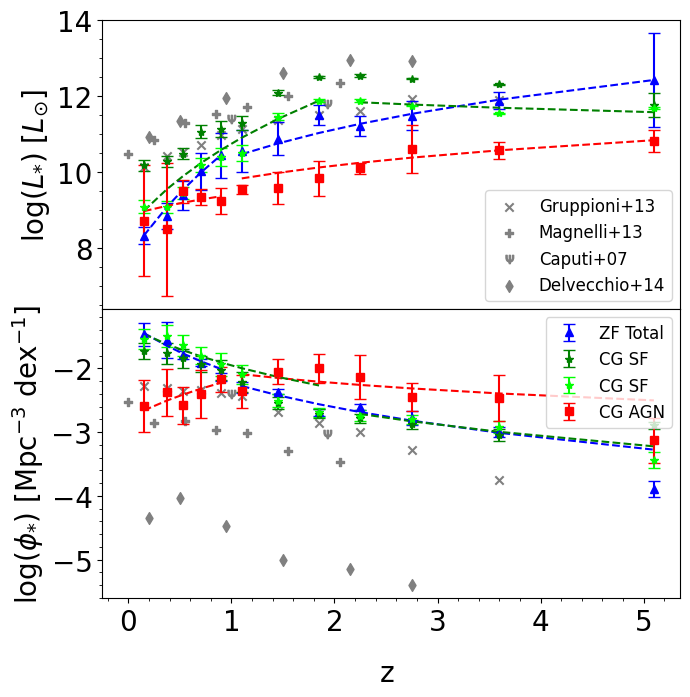

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
redshift_centers = np.mean(ZF_ALL['z'], axis=1)

from scipy.optimize import curve_fit

def one_plus_z(z, a, k):
    return a*(1 + z)**k

def get_params(x, y, z, ax, color, title=None):
    first_index = np.where(x <= z)[0][-1]+1

    # Left of z break
    params_lb, covars_lb = curve_fit(one_plus_z, x[:first_index], y[:first_index], p0=[y[0], 2])
    perr_lb = np.sqrt(np.diag(covars_lb))
    perr_lb[0] = perr_lb[0] / (params_lb[0] * np.log(10))
    params_lb[0] = np.log10(params_lb[0])
    ax.plot(x[:first_index], np.log10(one_plus_z(x[:first_index], 10**params_lb[0], params_lb[1]).astype(float)), color=color, linestyle='--')

    # Right of z break
    params_rb, covars_rb = curve_fit(one_plus_z, x[first_index:], y[first_index:], p0=[y[0], 2])
    perr_rb = np.sqrt(np.diag(covars_rb))
    perr_rb[0] = perr_rb[0] / (params_rb[0] * np.log(10))
    params_rb[0] = np.log10(params_rb[0])
    ax.plot(x[first_index:], np.log10(one_plus_z(x[first_index:], 10**params_rb[0], params_rb[1]).astype(float)), color=color, linestyle='--')
    
    if title is not None:
        print(title)
        print('----------')
        print(f'z < {z}: y = log_10(10^({np.round(params_lb[0],2)} +/- {np.round(perr_lb[0],2)}) * (1 + z)^({np.round(params_lb[1],2)} +/- {np.round(perr_lb[1],2)}))')
        print(f'z > {z}: y = log_10(10^({np.round(params_rb[0],2)} +/- {np.round(perr_rb[0],2)}) * (1 + z)^({np.round(params_rb[1],2)} +/- {np.round(perr_rb[1],2)}))')
        print()
    return (params_lb, perr_lb), (params_rb, perr_rb)

""" ZFOURGE Lstar """
ZF_LSTAR_params = ZF_ALL['saunder_p'][:,0].astype(float)
ZF_LSTAR_errors = ZF_ALL['saunder_e'][:,0].astype(float)
ax[0].errorbar(redshift_centers, np.log10(ZF_LSTAR_params), yerr=(ZF_LSTAR_errors / (ZF_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='^', color='blue')

""" ZFOURGE Phistar """
ZF_PHISTAR_params = ZF_ALL['saunder_p'][:,1].astype(float)
ZF_PHISTAR_errors = ZF_ALL['saunder_e'][:,1].astype(float)
ax[1].errorbar(redshift_centers, np.log10(ZF_PHISTAR_params), yerr=(ZF_PHISTAR_errors / (ZF_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='^', label='ZF Total', color='blue')

""" ZFOURGE SF Lstar """
# ZF_SF_LSTAR_params = ZF_SF['saunder_p'][:,0].astype(float)
# ZF_SF_LSTAR_errors = ZF_SF['saunder_e'][:,0].astype(float)
# ax[0].errorbar(redshift_centers, np.log10(ZF_SF_LSTAR_params), yerr=(ZF_SF_LSTAR_errors / (ZF_SF_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='o', label='ZF SF', color='green')

""" ZFOURGE SF Phistar """
# ZF_SF_PHISTAR_params = ZF_SF['saunder_p'][:,1].astype(float)
# ZF_SF_PHISTAR_errors = ZF_SF['saunder_e'][:,1].astype(float)
# ax[1].errorbar(redshift_centers, np.log10(ZF_SF_PHISTAR_params), yerr=(ZF_SF_PHISTAR_errors / (ZF_SF_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='o', label='ZF SF', color='blue')

""" ZFOURGE QUI Lstar """
# params = [[float(f"{x[0]:.6e}"), float(f"{x[1]:.6e}")] for x in ZF_QUI['saunder_p'] if len(x) > 0]
# errors = [[float(f"{x[0]:.6e}"), float(f"{x[1]:.6e}")] for x in ZF_QUI['saunder_e'] if len(x) > 0]
# ZF_AGN_LSTAR_params = np.array(params)[:,0].astype(float)
# ZF_AGN_LSTAR_errors = np.array(errors)[:,0].astype(float)
# ax[0].errorbar(redshift_centers[:-1], np.log10(ZF_AGN_LSTAR_params), yerr=(ZF_AGN_LSTAR_errors / (ZF_AGN_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='o', color='orange')

""" ZFOURGE QUI Phistar """
# ZF_AGN_PHISTAR_params = np.array(params)[:,1].astype(float)
# ZF_AGN_PHISTAR_errors = np.array(errors)[:,1].astype(float)
# ax[1].errorbar(redshift_centers[:-1], np.log10(ZF_AGN_PHISTAR_params), yerr=(ZF_AGN_PHISTAR_errors / (ZF_AGN_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='o', label='ZF Quiescent', color='orange')





""" CIGALE SF Lstar Schechter """
CG_SF_LSTAR_params = CG_SF['schech_p'][:,0].astype(float)
CG_SF_LSTAR_errors = CG_SF['schech_e'][:,0].astype(float)
ax[0].errorbar(redshift_centers, np.log10(CG_SF_LSTAR_params), yerr=(CG_SF_LSTAR_errors / (CG_SF_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='*', color='green')

""" CIGALE SF Phistar Schechter """
CG_SF_PHISTAR_params = CG_SF['schech_p'][:,1].astype(float)
CG_SF_PHISTAR_errors = CG_SF['schech_e'][:,1].astype(float)
ax[1].errorbar(redshift_centers, np.log10(CG_SF_PHISTAR_params), yerr=(CG_SF_PHISTAR_errors / (CG_SF_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='*', label='CG SF', color='green')

print(redshift_centers)
print(np.round(np.log10(CG_SF_PHISTAR_params),2).tolist())
print(np.round(CG_SF_PHISTAR_errors / (CG_SF_PHISTAR_params* np.log(10)),2).tolist())

""" CIGALE SF Lstar Saunders """
CG_SF_LSTAR_params = CG_SF['saunder_p'][:,0].astype(float)
CG_SF_LSTAR_errors = CG_SF['saunder_e'][:,0].astype(float)
ax[0].errorbar(redshift_centers, np.log10(CG_SF_LSTAR_params), yerr=(CG_SF_LSTAR_errors / (CG_SF_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='*', color='lime')

""" CIGALE SF Phistar Saunders """
CG_SF_PHISTAR_params = CG_SF['saunder_p'][:,1].astype(float)
CG_SF_PHISTAR_errors = CG_SF['saunder_e'][:,1].astype(float)
ax[1].errorbar(redshift_centers, np.log10(CG_SF_PHISTAR_params), yerr=(CG_SF_PHISTAR_errors / (CG_SF_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='*', label='CG SF', color='lime')

""" CIGALE AGN Lstar Saunders """
CG_AGN_LSTAR_params = CG_AGN['saunder_p'][:,0].astype(float)
CG_AGN_LSTAR_errors = CG_AGN['saunder_e'][:,0].astype(float)
ax[0].errorbar(redshift_centers, np.log10(CG_AGN_LSTAR_params), yerr=(CG_AGN_LSTAR_errors / (CG_AGN_LSTAR_params* np.log(10))), ls='none', capsize=4, marker='s', color='red')

""" CIGALE AGN Phistar Saunders """
CG_AGN_PHISTAR_params = CG_AGN['saunder_p'][:,1].astype(float)
CG_AGN_PHISTAR_errors = CG_AGN['saunder_e'][:,1].astype(float)
ax[1].errorbar(redshift_centers, np.log10(CG_AGN_PHISTAR_params), yerr=(CG_AGN_PHISTAR_errors / (CG_AGN_PHISTAR_params* np.log(10))), ls='none', capsize=4, marker='s', label='CG AGN', color='red')

""" Gruppioni """
grup_z = [0.15, 0.375, 0.525, 0.7, 0.9, 1.1, 1.45, 1.85, 2.25, 2.75, 3.6]
grup_phistar = [-2.27, -2.31, -2.35, -2.34, -2.39, -2.43, -2.69, -2.86, -3.00, -3.28, -3.75]
grup_lstar = [10.12, 10.42, 10.53, 10.71, 10.97, 11.13, 11.38, 11.50, 11.60, 11.91, 11.90]
ax[0].scatter(grup_z, grup_lstar, label='Gruppioni+13', color='grey', marker='x')
ax[1].scatter(grup_z, grup_phistar, color='grey', marker='x')

""" Magnelli """
mag_z = [0, 0.25, 0.55, 0.85, 1.15, 1.55, 2.05]
mag_phistar = [-2.52, -2.85, -2.82, -2.96, -3.01, -3.29, -3.47]
mag_lstar = [10.48, 10.84, 11.28, 11.53, 11.71, 12.00, 12.35]
ax[0].scatter(mag_z, mag_lstar, label='Magnelli+13', color='grey', marker='P')
ax[1].scatter(mag_z, mag_phistar, color='grey', marker='P')

""" Caputi """
cap_z = [1, 1.93]
cap_phistar = [-2.397, -3.036]
cap_lstar = [11.397, 11.785]
ax[0].scatter(cap_z, cap_lstar, label='Caputi+07', color='grey', marker='$\Psi$')
ax[1].scatter(cap_z, cap_phistar, color='grey', marker='$\Psi$')

""" Delvecchio """
devl_z = [0.2, 0.5, 0.95, 1.5, 2.15, 2.75]
delv_phistar = [-4.35, -4.03, -4.47, -5.00, -5.15, -5.40]
delv_lstar = [10.91, 11.34, 11.96, 12.61, 12.96, 12.92]
ax[0].scatter(devl_z, delv_lstar, label='Delvecchio+14', color='grey', marker='d')
ax[1].scatter(devl_z, delv_phistar, color='grey', marker='d')


ax[0].legend(loc='lower right', fontsize=12)
ax[0].set_ylabel('log$(L_{*})$ [$L_{\odot}$]', fontsize=20)
ax[0].tick_params(axis='both', labelsize=20)
ax[0].minorticks_on()

ax[1].legend(loc='upper right', fontsize=12)
ax[1].set_ylabel('log$(\phi_{*})$ [Mpc$^{-3}$ dex$^{-1}$]', fontsize=20)
ax[1].tick_params(axis='both', labelsize=20)
ax[1].minorticks_on()

get_params(redshift_centers, ZF_LSTAR_params, 1.0, ax[0], 'blue', title='ZF Lstar')
get_params(redshift_centers, ZF_PHISTAR_params, 1.0, ax[1], 'blue', title='ZF Phistar')

get_params(redshift_centers, CG_AGN_LSTAR_params, 1.0, ax[0], 'red', title='CG AGN Lstar')
get_params(redshift_centers, CG_AGN_PHISTAR_params, 1.0, ax[1], 'red', title='CG AGN Phistar')

get_params(redshift_centers, CG_SF_LSTAR_params, 2.0, ax[0], 'green', title='CG SF Lstar')
get_params(redshift_centers, CG_SF_PHISTAR_params, 2.0, ax[1], 'green', title='CG SF Phistar')

fig.supxlabel('z', fontsize=20, x=0.56)
plt.tight_layout()
plt.subplots_adjust(hspace=0)
if export:
    plt.savefig('Param Evo.png', dpi=300)
plt.show()